## Data discription

This dataset was taken from kaggle , it contains credit card transaction details of customers. Some of the transactions are fraudelent. The main objective of this project is to build a model to trace the fraudelent transaction. The features are all numerical which is developed through PCA transformation.

## Procedure 

1. Data Exploration
2. Feature Engineering
3. Feature Selection
4. Modelling 
5. Cross Validation

##### since the data is highly imbalanced I will be using under and oversampling techniques for better prediction.

## Data Exploration

In [1]:
#importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pingouin as pg
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
%matplotlib inline

Using TensorFlow backend.


In [3]:
credit= pd.read_csv('creditcard.csv')

In [4]:
credit.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#data has no null value

In [7]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#checking for pearson correlation between independent and dependent features

In [10]:
for i in list(credit.columns):
    print(i)
    print(pg.corr(credit[i],credit['Class']))

Time
              n      r           CI95%   r2  adj_r2         p-val       BF10  \
pearson  284807 -0.012  [-0.02, -0.01]  0.0     0.0  4.818269e-11  5.785e+06   

         power  
pearson    1.0  
V1
              n      r         CI95%    r2  adj_r2  p-val BF10  power
pearson  284807 -0.101  [-0.1, -0.1]  0.01    0.01    0.0  inf    1.0
V2
              n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  284807  0.091  [0.09, 0.09]  0.008   0.008    0.0  inf    1.0
V3
              n      r          CI95%     r2  adj_r2  p-val BF10  power
pearson  284807 -0.193  [-0.2, -0.19]  0.037   0.037    0.0  inf    1.0
V4
              n      r         CI95%     r2  adj_r2  p-val BF10  power
pearson  284807  0.133  [0.13, 0.14]  0.018   0.018    0.0  inf    1.0
V5
              n      r          CI95%     r2  adj_r2  p-val BF10  power
pearson  284807 -0.095  [-0.1, -0.09]  0.009   0.009    0.0  inf    1.0
V6
              n      r           CI95%     r2  adj_r2          p-val  

columns to be dropped- v6,v8,v13,v15,v19,v20,v22,v23,v24,v25,v26,v27,v28. 
This will be dealt with in feature selection section

In [11]:
#plotting independent feature against dependent 

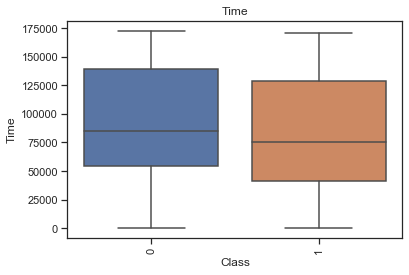

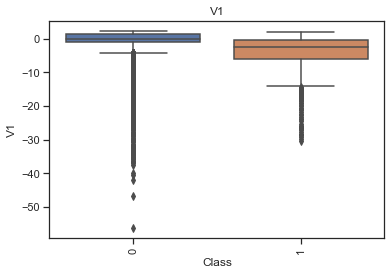

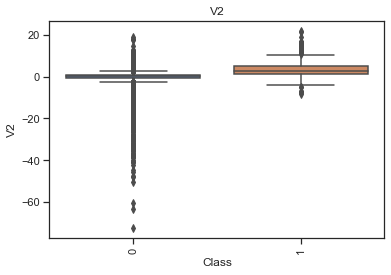

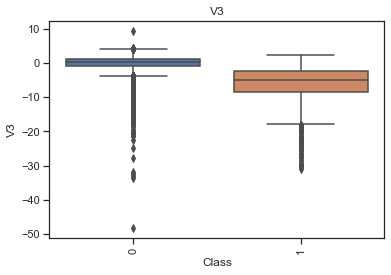

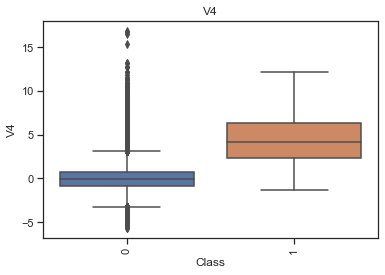

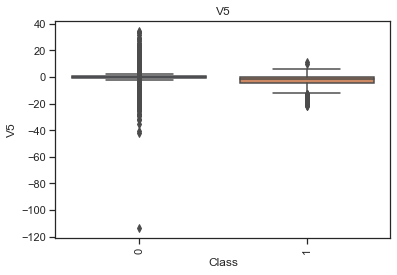

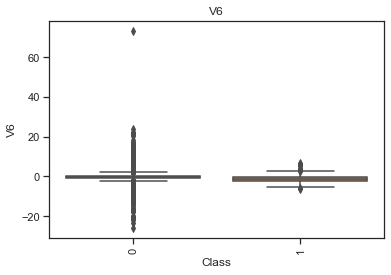

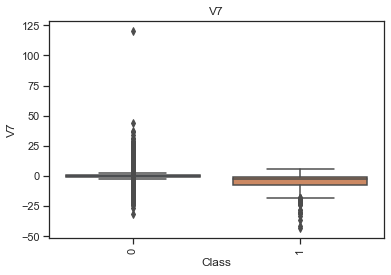

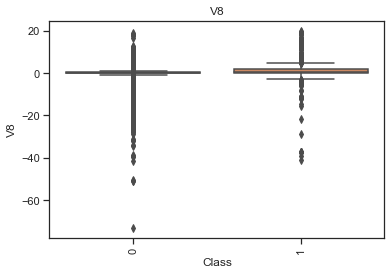

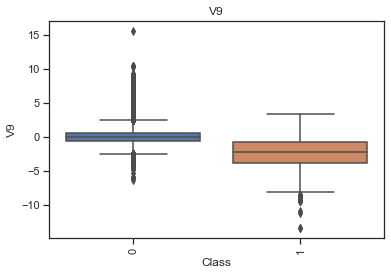

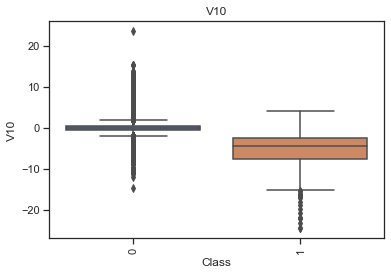

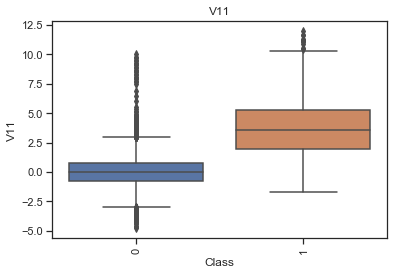

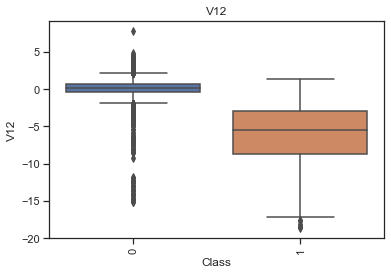

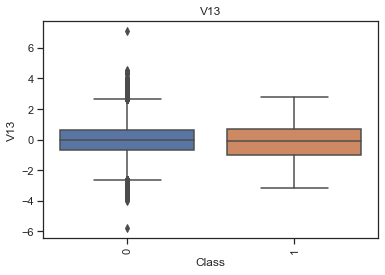

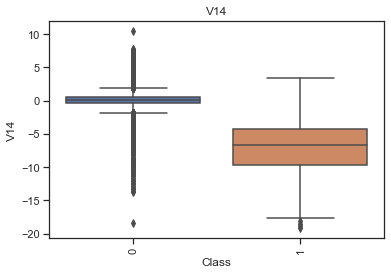

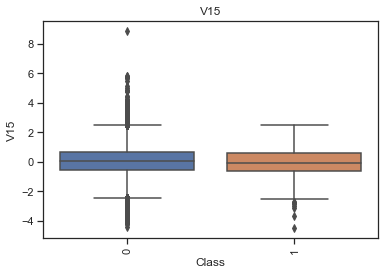

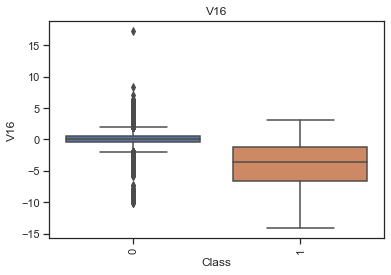

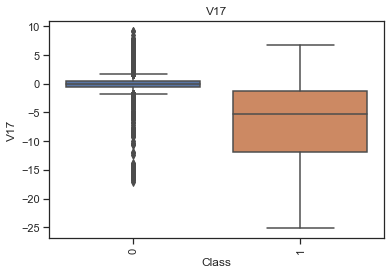

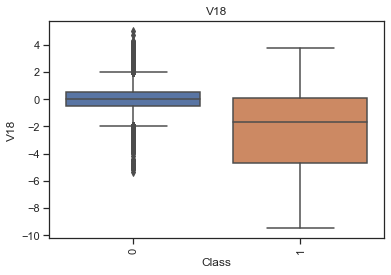

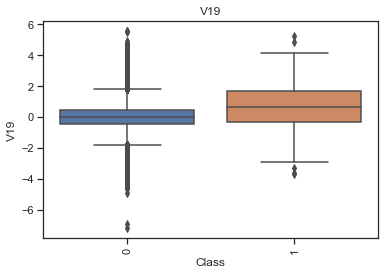

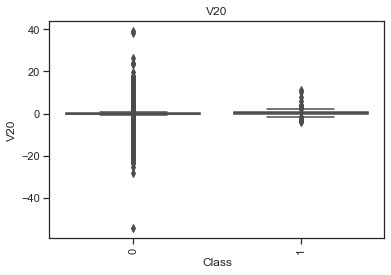

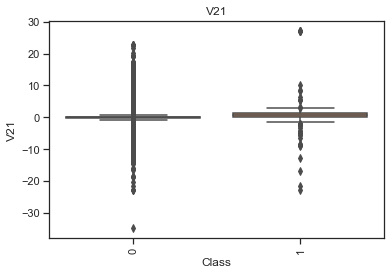

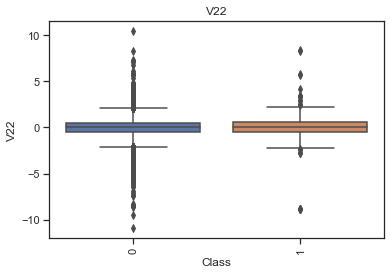

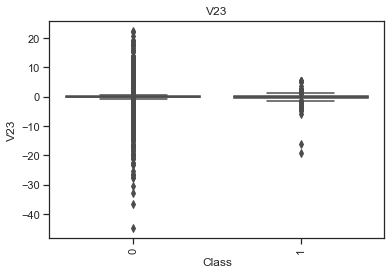

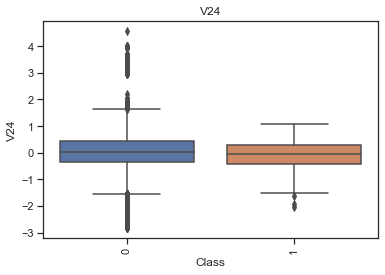

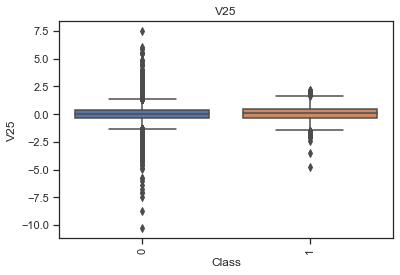

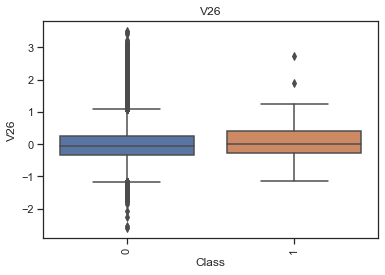

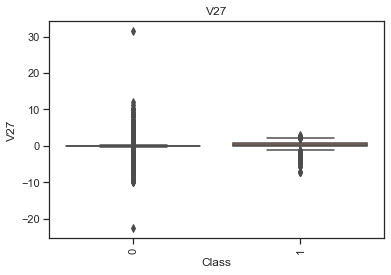

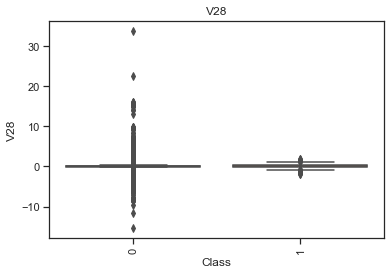

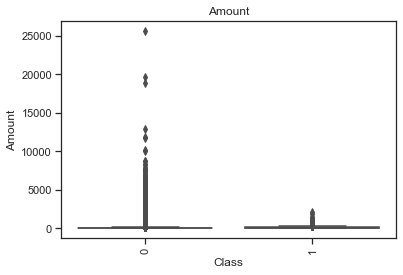

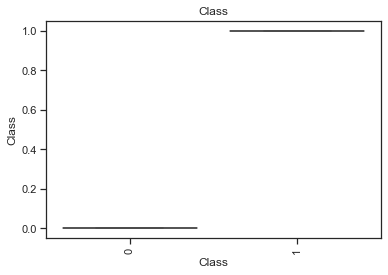

In [12]:
for feature in credit.columns:
    sns.boxplot(x='Class',y=feature,data=credit)
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

insight from above graph:
1. almost every features have outliers
2. in most of the features class 0 and 1 have similar distribution of values hence not correlated and can be dropped

In [13]:
#checking the distribution of continuous variables

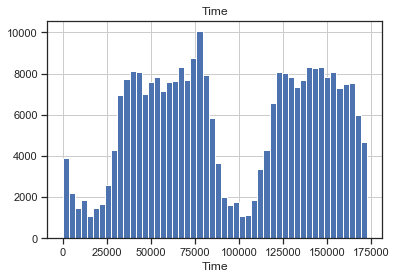

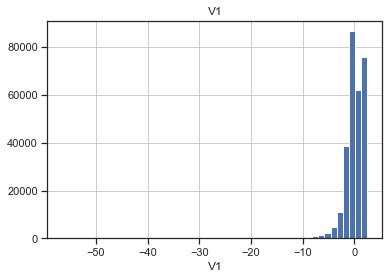

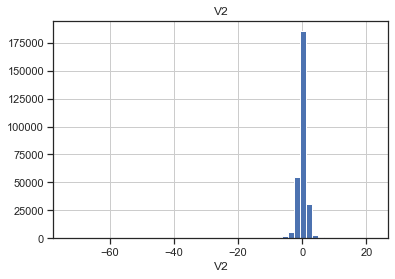

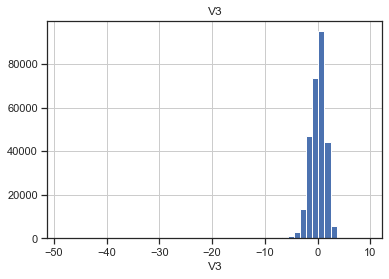

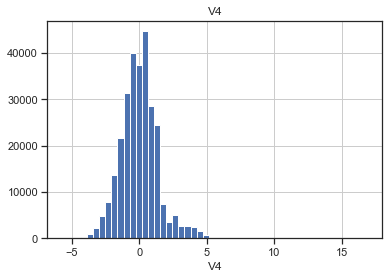

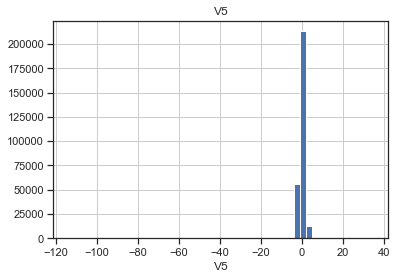

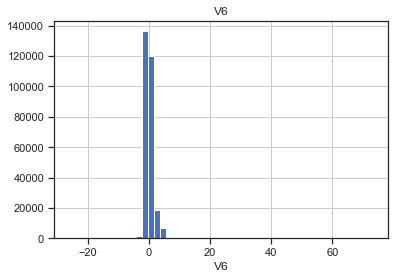

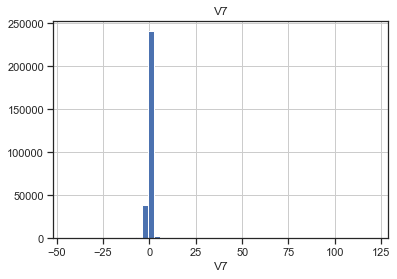

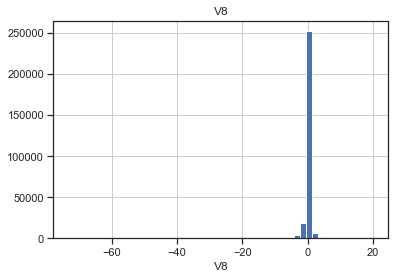

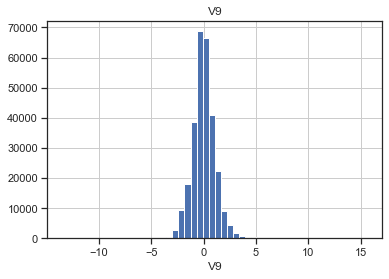

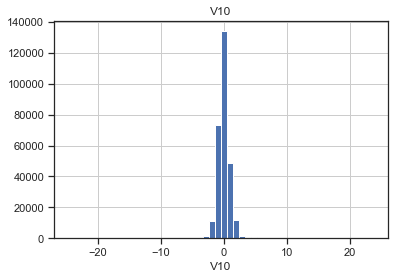

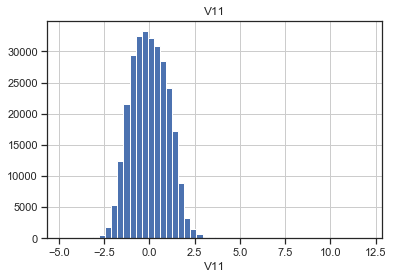

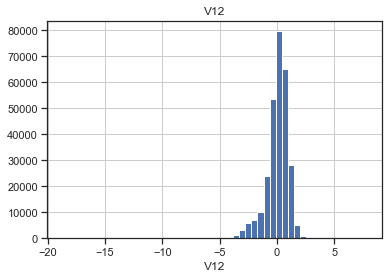

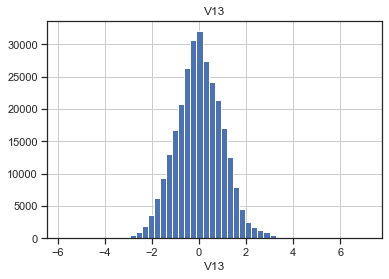

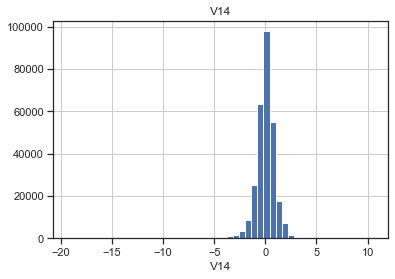

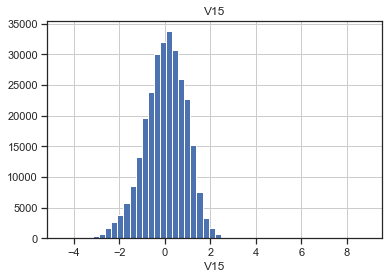

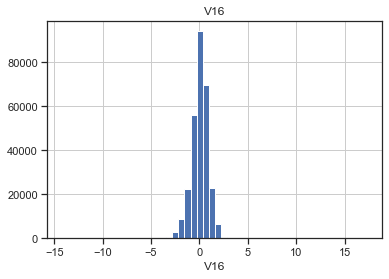

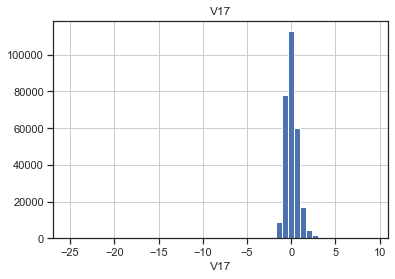

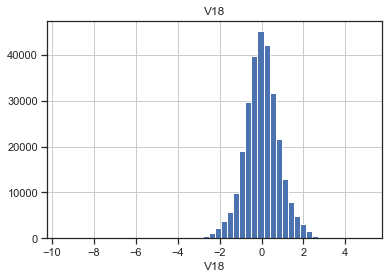

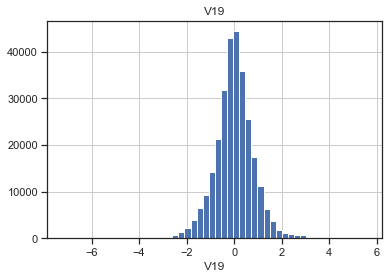

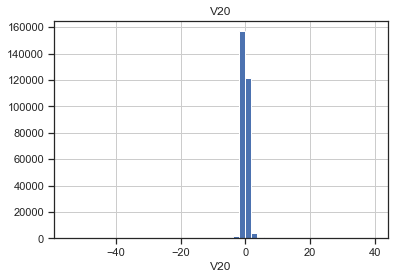

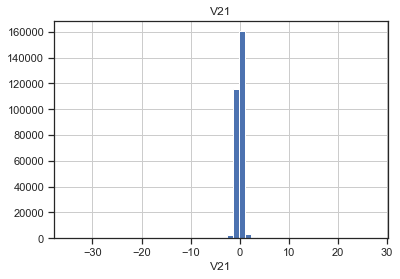

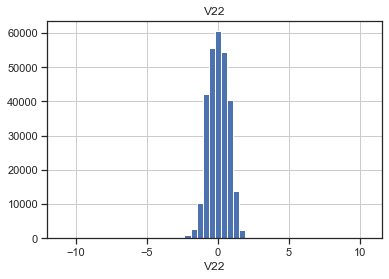

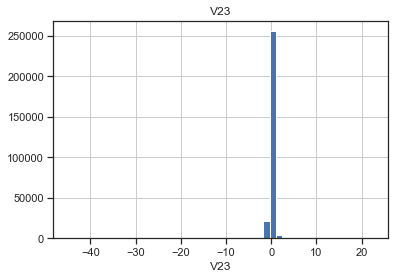

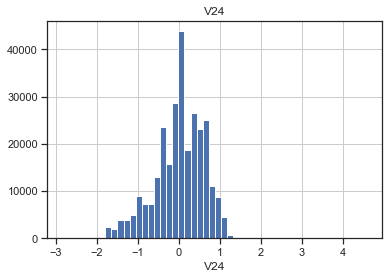

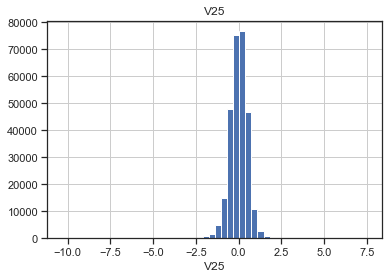

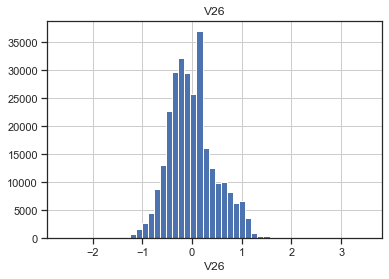

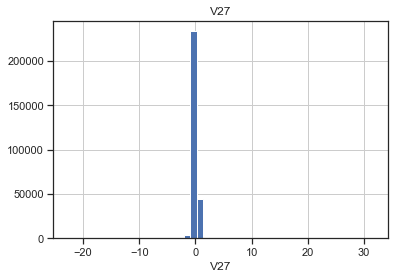

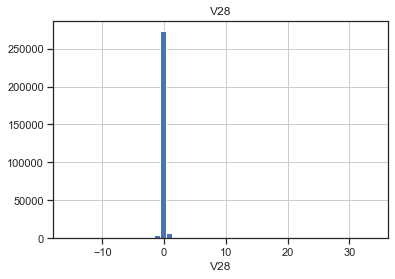

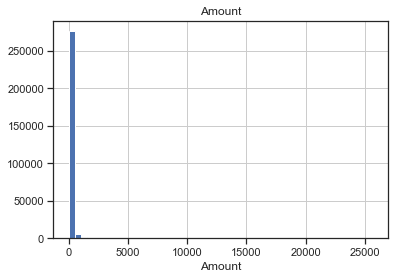

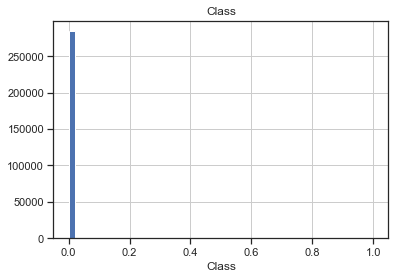

In [14]:
for feature in credit.columns:
    credit[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

fraudelent transaction is 0.1727485630620034% of total transaction


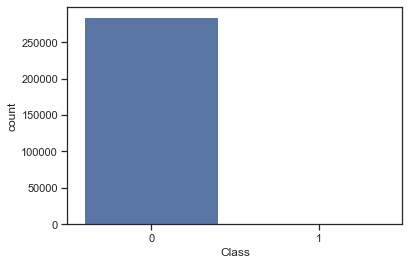

In [15]:
#countplot for target variable
sns.countplot(credit['Class'])
print("fraudelent transaction is {}% of total transaction".format(len(credit[credit.Class==1])/len(credit)*100))

1. From the above graph except for Amount rest other features are normally distributed. Amount column will be converted into a normal distribution in feature engineering part.
2. clearly from the above graph data is highly imbalanced, hence, even without modelling accuracy will be higher but our focus here is to trace the minor data hence we have to reshample the data to make it balanced. techniques which can be used here are Undershampling using nearmiss or oversampling using SMOTE.

## Feature Engineering

### Outlier Removal

In [16]:
#from the above boxplot the outlier corresponding to each features will be removed such that the values in class 1 are not touched
credit[(credit['V1']<-40)&(credit.Class==1)].shape

(0, 31)

In [17]:
credit= credit[credit['V1']>-40]

In [18]:
credit[credit['V2']<-40].shape

(9, 31)

In [19]:
credit= credit[credit['V2']>-40]

In [20]:
credit[credit['V3']<-32].shape

(4, 31)

In [21]:
credit= credit[credit['V3']>-32]

In [22]:
credit[credit['V4']>15].shape

(0, 31)

In [23]:
credit[(credit['V5']<-50)].shape

(0, 31)

In [24]:
credit[(credit['V6']>40)].shape

(0, 31)

In [25]:
credit[(credit['V7']>40)].shape

(1, 31)

In [26]:
credit= credit[credit['V7']<40]

In [27]:
credit[(credit['V27']<-15)].shape

(1, 31)

In [28]:
credit= credit[credit['V27']>-15]

In [29]:
credit= credit[credit['Amount']<9000]

In [30]:
#converting Amount into a normal distribution

In [31]:
scaler=StandardScaler()

In [32]:
credit['std_Amount']= scaler.fit_transform(credit['Amount'].values.reshape(-1,1))

In [33]:
    #removing time and amount features since time is uniformally distributed along all values
    credit= credit.drop(['Time','Amount'],axis=1)

In [34]:
#seperating target variable from independent variable
x= credit.drop(['Class'],axis=1)
y= credit.Class

## Feature Selection

###### selecting features using L1 regularization

In [35]:
feature_sel = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel.fit(x,y)
feature_sel.get_support()

array([ True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [36]:
#listing the selected features
feature_selected = x.columns[(feature_sel.get_support())]
#dropping the other features 
x= x[feature_selected]
print(feature_selected)
print("Total number of selected features: {}".format(len(feature_selected)))

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17'],
      dtype='object')
Total number of selected features: 12


## Model construction

### Logistic regression model with complete dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [38]:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
#predicting target value for test data
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.89      0.60      0.72       134

    accuracy                           1.00     85436
   macro avg       0.94      0.80      0.86     85436
weighted avg       1.00      1.00      1.00     85436

[[85292    10]
 [   53    81]]


In [39]:
#calculating AUC

Accuracy is 0.9992626059272438
Recall value is 0.6044776119402985


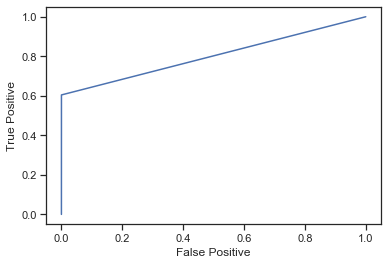

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = metrics.roc_auc_score(y_test, predictions)
print("Accuracy is {}".format(metrics.accuracy_score(y_test,predictions)))
print("Recall value is {}".format(metrics.recall_score(y_test,predictions)))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()

In [41]:
#calculating AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.8021801906973538


since the data is highly imbalanced recall value has higher significance than accuracy. and since less than 1 percent of the data in target variable corresponds to the fraud transaction the accuracy is always going to be higher but irrelevant.

### logistic regression with undersampled data

In [42]:
nm= NearMiss()
x_us, y_us= nm.fit_sample(x,y)
print("shape of x_us :{}".format(x_us.shape))
print("shape of y_us :{}".format(y_us.shape))
print("count of values from both categories in taget variable is: {}".format(Counter(y_us)))

shape of x_us :(984, 12)
shape of y_us :(984,)
count of values from both categories in taget variable is: Counter({0: 492, 1: 492})


In [43]:
#applying train test split on undersampled data

In [44]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(x_us, 
                                                    y_us, test_size=0.30, 
                                                    random_state=101)

In [45]:
#fitting the log model 

In [46]:
logmodel.fit(X_train_us,y_train_us)
#predicting the target values corresponding to test set
pred_us= logmodel.predict(X_test_us)
print(confusion_matrix(y_test_us,pred_us))
print(classification_report(y_test_us,pred_us))

[[145   2]
 [  7 142]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       147
           1       0.99      0.95      0.97       149

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



In [47]:
#calculating AUC and accuracy 

Accuracy is :0.9695945945945946
Recall is :0.9530201342281879


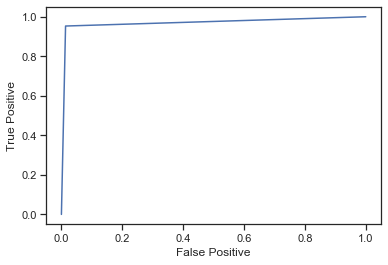

AUC: 0.9697073460256586


In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_us, pred_us)
fpr, tpr, thresholds = roc_curve(y_test_us, pred_us)
print("Accuracy is :{}".format(metrics.accuracy_score(y_test_us,pred_us)))
print("Recall is :{}".format(metrics.recall_score(y_test_us,pred_us)))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


### Logistic regression with Oversampling using SMOTE

In [49]:


ros= RandomOverSampler()
sm= SMOTE()

In [50]:
#fitting the data in model
x_os,y_os= sm.fit_sample(x,y)
print("shape of x_os :{}".format(x_os.shape))
print("shape of y_os :{}".format(y_os.shape))
print("count of values from both categories in taget variable is: {}".format(Counter(y_os)))

shape of x_os :(568584, 12)
shape of y_os :(568584,)
count of values from both categories in taget variable is: Counter({0: 284292, 1: 284292})


In [51]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split( x_os, y_os, test_size=0.30, random_state=42)
logmodel.fit(X_train_os,y_train_os)
pred_os= logmodel.predict(X_test_os)
print(confusion_matrix(y_test_os,pred_os))
print(classification_report(y_test_os,pred_os))

[[82968  2144]
 [ 8651 76813]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     85112
           1       0.97      0.90      0.93     85464

    accuracy                           0.94    170576
   macro avg       0.94      0.94      0.94    170576
weighted avg       0.94      0.94      0.94    170576



Accuracy is :0.9367144264140325
Recall is :0.8987760928578115


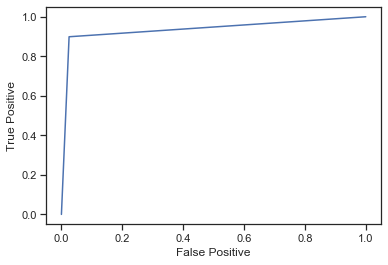

AUC: 0.9367928777100412


In [52]:
#Accuracy,Recall and AUC calculation
fpr, tpr, thresholds = metrics.roc_curve(y_test_os, pred_os)
fpr, tpr, thresholds = roc_curve(y_test_os, pred_os)
print("Accuracy is :{}".format(metrics.accuracy_score(y_test_os,pred_os)))
print("Recall is :{}".format(metrics.recall_score(y_test_os,pred_os)))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

1. Recall value is higher in undersampled and oversampled data which means most of the fraud transaction is being caught. (Recall= TP/TP+FN).
2. undersampled model is best among the above three but there is still a scope for better precision, for that we can try other regression techniques like RandomForest and XGBoost.